<a href="https://colab.research.google.com/github/ShitoshnaSingh/Assignment01/blob/main/2332945_Shitoshna_Singh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3 Tasks - To - Do:

Please Solve all the Problems as instructed:

3.1 Problem - 1: Getting Started with Data Exploration - Some Warm up
Exercises:
1. Data Exploration and Understanding:

• Dataset Overview:
1. Load the dataset and display the first 10 rows.


In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
%cd /content/drive/MyDrive/Assignment01

/content/drive/MyDrive/Assignment01


In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
df = pd.read_csv('WHR-2024-5CS037.csv')

In [95]:
print("First 10 rows of the dataset:")
print(df.head(10))

First 10 rows of the dataset:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3         

2. Identify the number of rows and columns in the dataset.

In [96]:
num_rows, num_columns = df.shape
print(f"\nNumber of rows: {num_rows}, Number of columns: {num_columns}")


Number of rows: 143, Number of columns: 9


3. List all the columns and their data types.

In [97]:
print("\nColumns and their data types:")
print(df.dtypes)



Columns and their data types:
Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


• Basic Statistics:
1. Calculate the mean, median, and standard deviation for the Score column.

In [98]:
mean_score = df['score'].mean()
median_score = df['score'].median()
std_dev_score = df['score'].std()

print(f"\nMean of Score: {mean_score}")
print(f"Median of Score: {median_score}")
print(f"Standard Deviation of Score: {std_dev_score}")


Mean of Score: 5.52758041958042
Median of Score: 5.785
Standard Deviation of Score: 1.1707165099442995


2. Identify the country with the highest and lowest happiness scores.

In [99]:
max_score_country = df.loc[df['score'].idxmax(), 'Country name']
min_score_country = df.loc[df['score'].idxmin(), 'Country name']

print(f"\nCountry with the highest happiness score: {max_score_country}")
print(f"Country with the lowest happiness score: {min_score_country}")


Country with the highest happiness score: Finland
Country with the lowest happiness score: Afghanistan


• Missing Values:
1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [100]:
missing_values = df.isnull().sum()
print("\nMissing values in the dataset:")
print(missing_values)


Missing values in the dataset:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


• Filtering and Sorting:
1. Filter the dataset to show only the countries with a Score greater than 7.5.

In [101]:
filtered_df = df[df['score'] > 7.5]

2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.

In [102]:
sorted_filtered_df = filtered_df.sort_values(by='Log GDP per capita', ascending=False)
print("\nTop 10 countries with Score > 7.5 sorted by GDP per Capita:")
print(sorted_filtered_df.head(10))


Top 10 countries with Score > 7.5 sorted by GDP per Capita:
  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


• Adding New Columns:
1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

  Low − (Score < 4)
  Medium − (4 ≤ Score ≤ 6)
  High − (Score > 6)

In [103]:
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

df['Happiness_Category'] = df['score'].apply(categorize_happiness)

print("\nDataset with the new 'Happiness_Category' column:")
print(df[['Country name', 'score', 'Happiness_Category']].head(10))


Dataset with the new 'Happiness_Category' column:
  Country name  score Happiness_Category
0      Finland  7.741               High
1      Denmark  7.583               High
2      Iceland  7.525               High
3       Sweden  7.344               High
4       Israel  7.341               High
5  Netherlands  7.319               High
6       Norway  7.302               High
7   Luxembourg  7.122               High
8  Switzerland  7.060               High
9    Australia  7.057               High


2. Data Visualizations:

  • Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

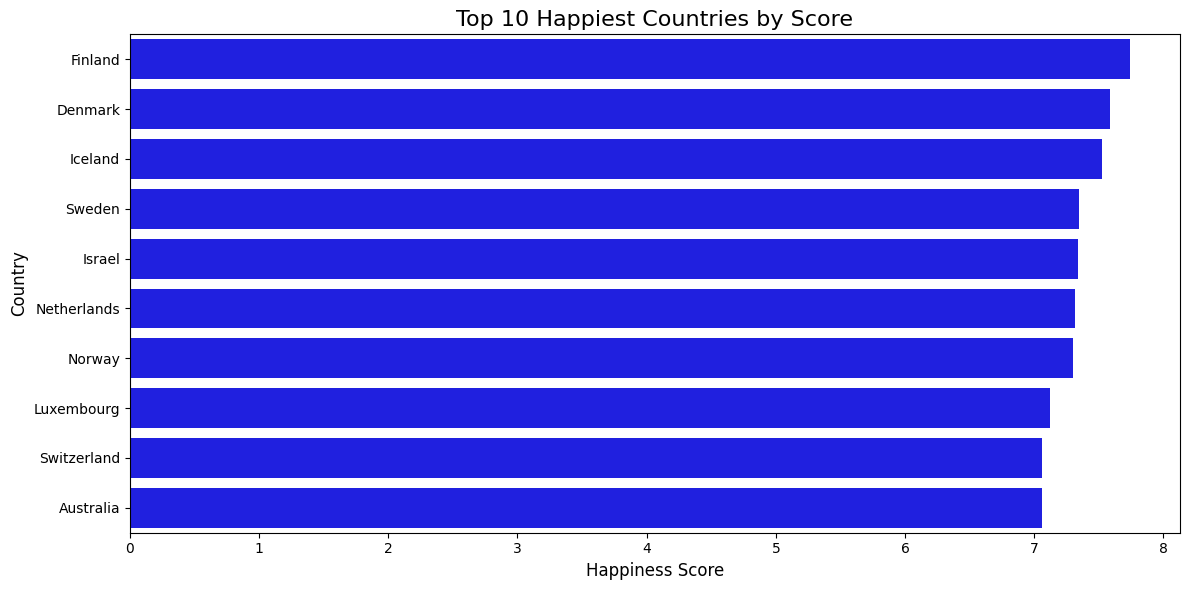

In [104]:
top_10_happiest = df.nlargest(10, 'score')
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_happiest, x='score', y='Country name', color='blue')
plt.title('Top 10 Happiest Countries by Score', fontsize=16)
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.show()

  • Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

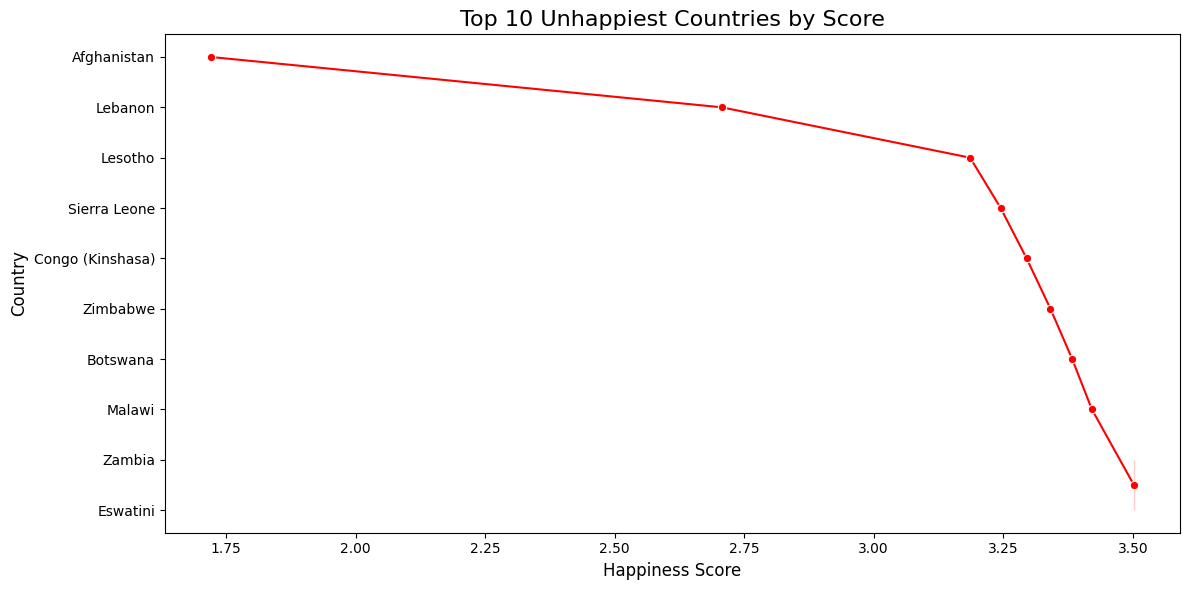

In [105]:
top_10_unhappiest = df.nsmallest(10, 'score')
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_10_unhappiest, x='score', y='Country name', marker='o', color='red')
plt.title('Top 10 Unhappiest Countries by Score', fontsize=16)
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.show()

• Plot a histogram for the Score column to show its distribution and also interpret.

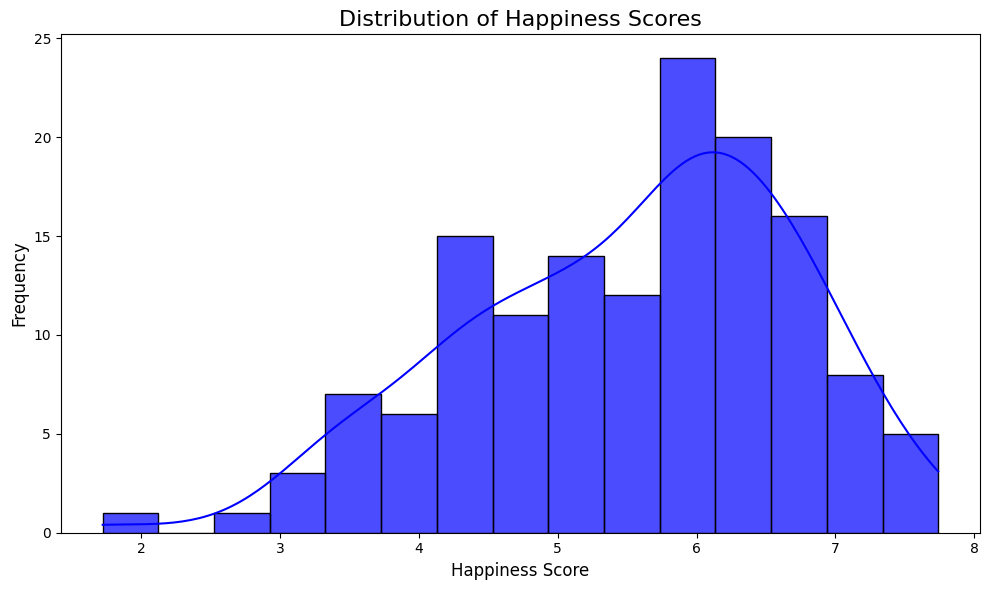

In [106]:
plt.figure(figsize=(10, 6))
sns.histplot(df['score'], bins=15, kde=True, color='blue', alpha=0.7)
plt.title('Distribution of Happiness Scores', fontsize=16)
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()


• Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

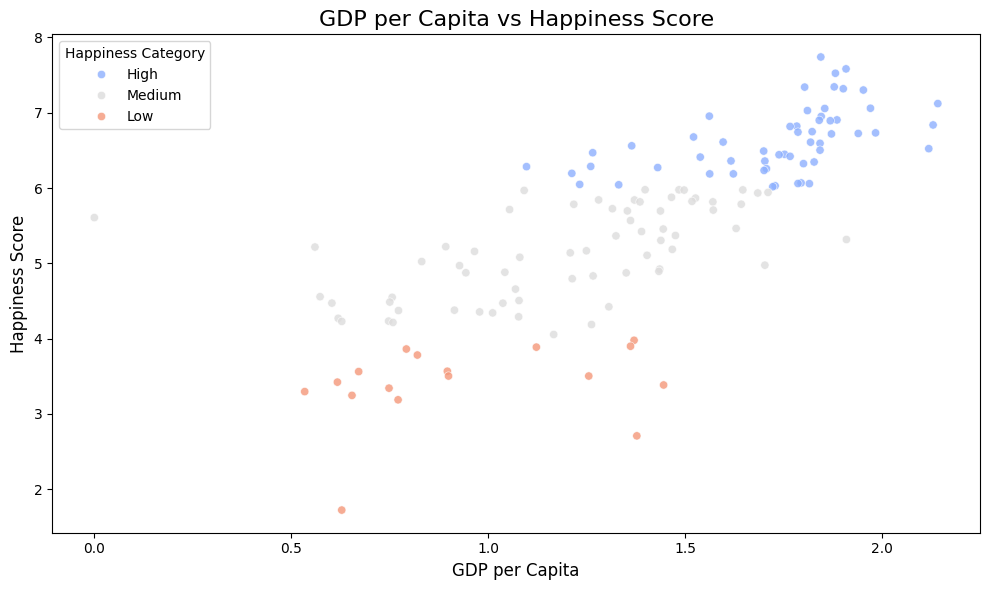

In [107]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Log GDP per capita', y='score', hue='Happiness_Category', palette='coolwarm', alpha=0.8)
plt.title('GDP per Capita vs Happiness Score', fontsize=16)
plt.xlabel('GDP per Capita', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.legend(title='Happiness Category', loc='upper left')
plt.tight_layout()
plt.show()

3.2 Problem - 2 - Some Advance Data Exploration Task:

Task - 1 - Setup Task - Preparing the South-Asia Dataset:
Steps:
1. Define the countries in South Asia with a list for example:

  south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Srilanka"]

In [108]:
south_asian_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Srilanka"
]

2. Use the list from step - 1 to filter the dataset {i.e. filtered out matching dataset from list.}

In [109]:
south_asia_df = df[df['Country name'].isin(south_asian_countries)]

print("\nFiltered South Asia Dataset:")
print(south_asia_df)


Filtered South Asia Dataset:
    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopia + residual Happiness_Category  
92                       0.115                1.783             Medium  


3. Save the filtered dataframe as separate CSV files for future use.

In [110]:
south_asia_df.to_csv('South_Asia_Happiness.csv', index=False)

print("\nSouth Asia dataset saved as 'South_Asia_happiness.csv'.")


South Asia dataset saved as 'South_Asia_happiness.csv'.


Task - 2 - Composite Score Ranking:
Tasks:
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

    Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support + 0.30 × Healthy Life Expectancy

In [111]:
south_asia_df['Composite Score'] = (
    0.40 * south_asia_df['Log GDP per capita'] +
    0.30 * south_asia_df['Social support'] +
    0.30 * south_asia_df['Healthy life expectancy']
)

<ipython-input-111-d352668c49c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['Composite Score'] = (


2. Rank the South Asian countries based on the Composite Score in descending order.

In [112]:
south_asia_df = south_asia_df.sort_values(by='Composite Score', ascending=False)

print("\nSouth Asian countries ranked by Composite Score:")
print(south_asia_df[['Country name', 'Composite Score', 'score']])


South Asian countries ranked by Composite Score:
    Country name  Composite Score  score
92         Nepal           0.8159  5.158
125        India           0.7874  4.054
107     Pakistan           0.7039  4.657
128   Bangladesh           0.6774  3.886
142  Afghanistan           0.3238  1.721


3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

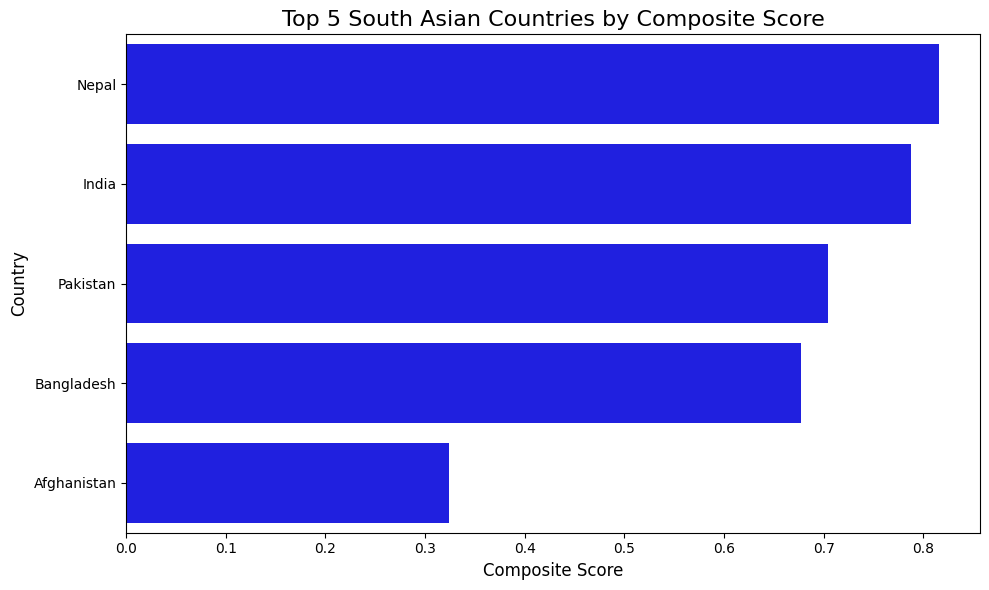

In [113]:
top_5_composite = south_asia_df.head(5)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_composite, x='Composite Score', y='Country name', color='blue')
plt.title('Top 5 South Asian Countries by Composite Score', fontsize=16)
plt.xlabel('Composite Score', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.show()

4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

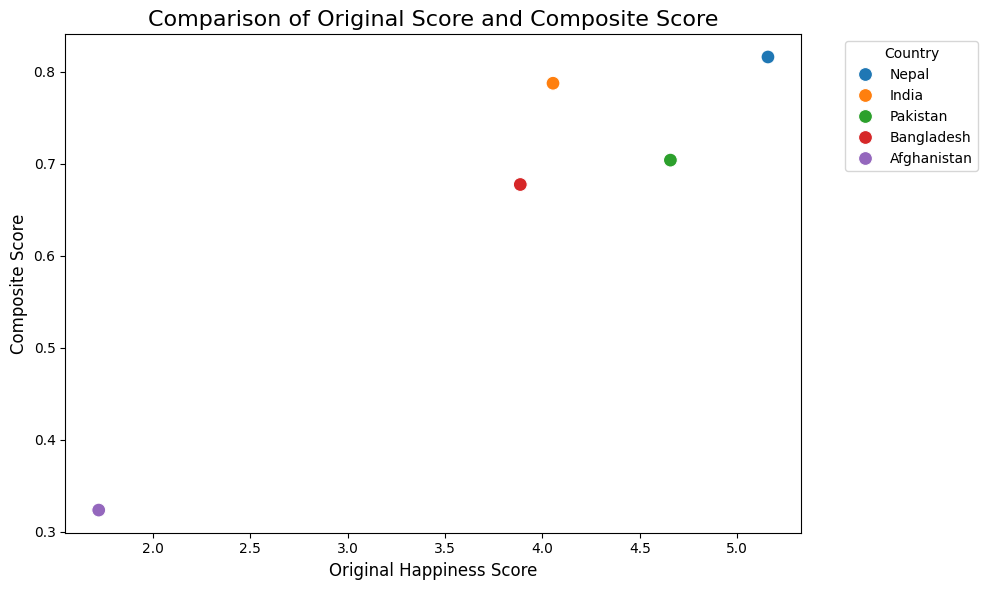

In [114]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=south_asia_df, x='score', y='Composite Score', hue='Country name', palette='tab10', s=100)
plt.title('Comparison of Original Score and Composite Score', fontsize=16)
plt.xlabel('Original Happiness Score', fontsize=12)
plt.ylabel('Composite Score', fontsize=12)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Task - 3 - Outlier Detection:

Tasks:
1. Identify outlier countries in South Asia based on their Score and GDP per Capita.

In [115]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile
    Q3 = data[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

score_outliers = detect_outliers_iqr(south_asia_df, 'score')
gdp_outliers = detect_outliers_iqr(south_asia_df, 'Log GDP per capita')

outlier_countries = pd.concat([score_outliers, gdp_outliers]).drop_duplicates()

print("\nOutlier countries based on Score and GDP per Capita:")
print(outlier_countries[['Country name', 'score', 'Log GDP per capita']])


Outlier countries based on Score and GDP per Capita:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628


2. Define outliers using the 1.5 × IQR rule.

In [116]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile
    Q3 = data[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.

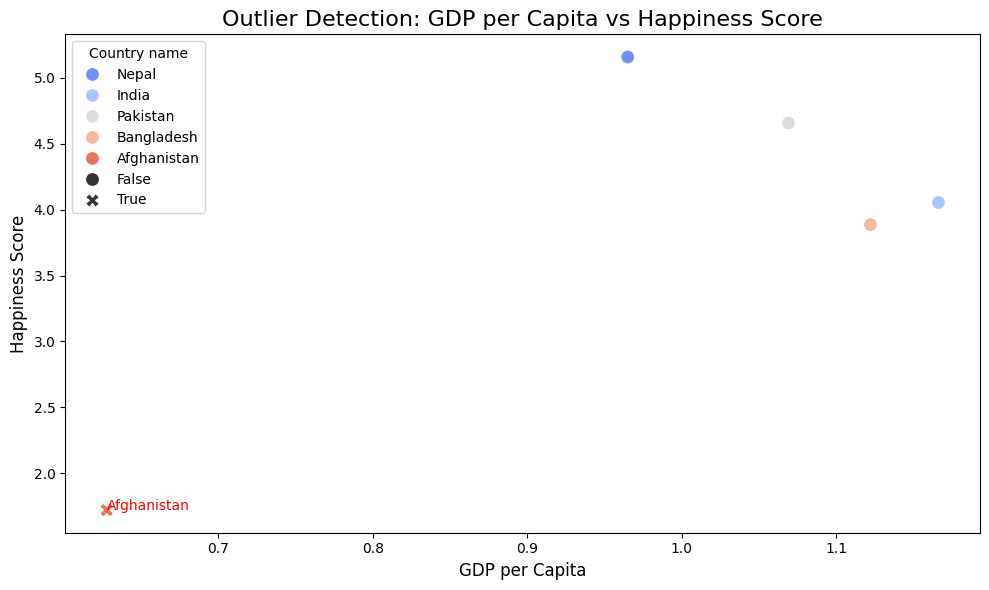

In [117]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=south_asia_df,
    x='Log GDP per capita',
    y='score',
    hue='Country name',
    style=south_asia_df['Country name'].isin(outlier_countries['Country name']),
    palette='coolwarm',
    s=100
)

for _, row in outlier_countries.iterrows():
    plt.text(row['Log GDP per capita'], row['score'], row['Country name'], fontsize=10, color='red')

plt.title('Outlier Detection: GDP per Capita vs Happiness Score', fontsize=16)
plt.xlabel('GDP per Capita', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.tight_layout()
plt.show()

4. Discuss the characteristics of these outliers and their potential impact on regional averages.

In [118]:
print("\nDiscussion on Outliers:")
for _, row in outlier_countries.iterrows():
    print(f"{row['Country name']} - Score: {row['score']}, GDP per Capita: {row['Log GDP per capita']}")
print("\nOutliers may significantly influence the regional averages for both Score and GDP per Capita.")


Discussion on Outliers:
Afghanistan - Score: 1.721, GDP per Capita: 0.628

Outliers may significantly influence the regional averages for both Score and GDP per Capita.


Task - 4 - Exploring Trends Across Metrics:

Tasks:
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.

In [119]:
freedom_corr = south_asia_df['Freedom to make life choices'].corr(south_asia_df['score'])
generosity_corr = south_asia_df['Generosity'].corr(south_asia_df['score'])

print(f"Pearson correlation between Score and Freedom to Make Life Choices: {freedom_corr:.2f}")
print(f"Pearson correlation between Score and Generosity: {generosity_corr:.2f}")

Pearson correlation between Score and Freedom to Make Life Choices: 0.80
Pearson correlation between Score and Generosity: 0.88


2. Create scatter plots with trendlines for these metrics against the Score.

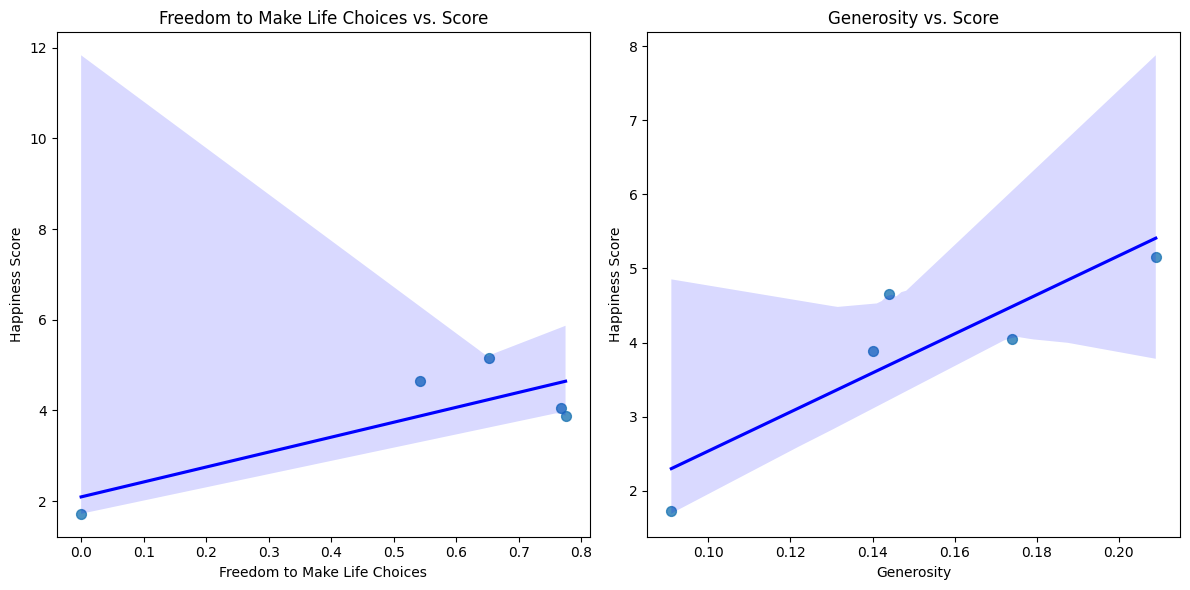

In [120]:
plt.figure(figsize=(12, 6))

# Freedom to Make Life Choices
plt.subplot(1, 2, 1)
sns.regplot(
    data=south_asia_df,
    x='Freedom to make life choices',
    y='score',
    scatter_kws={'s': 50},
    line_kws={'color': 'blue'},
)
plt.title('Freedom to Make Life Choices vs. Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')

# Generosity
plt.subplot(1, 2, 2)
sns.regplot(
    data=south_asia_df,
    x='Generosity',
    y='score',
    scatter_kws={'s': 50},
    line_kws={'color': 'blue'},
)
plt.title('Generosity vs. Score')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')

plt.tight_layout()
plt.show()

3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

In [121]:
if abs(freedom_corr) > abs(generosity_corr):
    strongest = "Freedom to make life choices"
    weakest = "Generosity"
else:
    strongest = "Generosity"
    weakest = "Freedom to make life choices"

print(f"The strongest relationship with the Score is for {strongest}.")
print(f"The weakest relationship with the Score is for {weakest}.")


The strongest relationship with the Score is for Generosity.
The weakest relationship with the Score is for Freedom to make life choices.


Task - 5 - Gap Analysis:

Tasks:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.

In [122]:
south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']

2. Rank the South Asian countries by this gap in both ascending and descending order.

In [123]:
ranked_ascending = south_asia_df.sort_values(by='GDP-Score Gap', ascending=True)
ranked_descending = south_asia_df.sort_values(by='GDP-Score Gap', ascending=False)

print("Top 3 countries with the largest negative gaps:")
print(ranked_ascending[['Country name', 'Log GDP per capita', 'score', 'GDP-Score Gap']].head(3))

print("\nTop 3 countries with the largest positive gaps:")
print(ranked_descending[['Country name', 'Log GDP per capita', 'score', 'GDP-Score Gap']].head(3))

Top 3 countries with the largest negative gaps:
    Country name  Log GDP per capita  score  GDP-Score Gap
92         Nepal               0.965  5.158         -4.193
107     Pakistan               1.069  4.657         -3.588
125        India               1.166  4.054         -2.888

Top 3 countries with the largest positive gaps:
    Country name  Log GDP per capita  score  GDP-Score Gap
142  Afghanistan               0.628  1.721         -1.093
128   Bangladesh               1.122  3.886         -2.764
125        India               1.166  4.054         -2.888


3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.

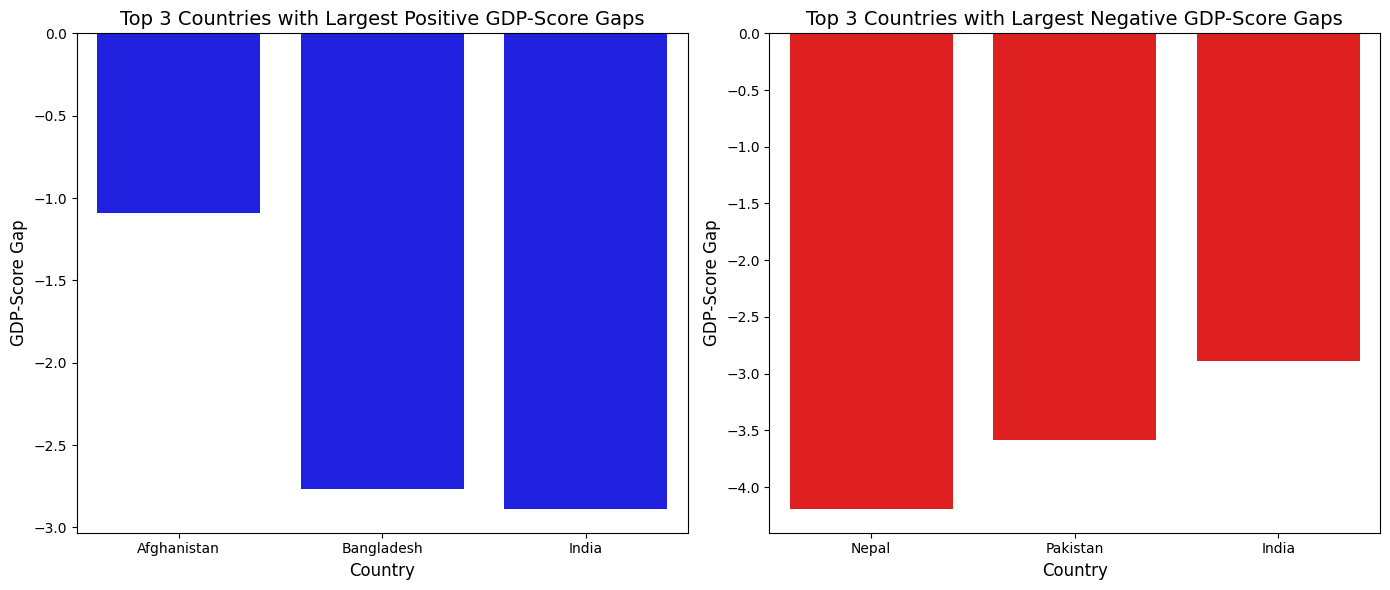

In [124]:
top_positive_gaps = ranked_descending.head(3)
top_negative_gaps = ranked_ascending.head(3)

plt.figure(figsize=(14, 6))

# Positive gaps
plt.subplot(1, 2, 1)
sns.barplot(data=top_positive_gaps, x='Country name', y='GDP-Score Gap', color='blue')
plt.title('Top 3 Countries with Largest Positive GDP-Score Gaps', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('GDP-Score Gap', fontsize=12)

# Negative gaps
plt.subplot(1, 2, 2)
sns.barplot(data=top_negative_gaps, x='Country name', y='GDP-Score Gap', color='red')
plt.title('Top 3 Countries with Largest Negative GDP-Score Gaps', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('GDP-Score Gap', fontsize=12)

plt.tight_layout()
plt.show()

4. Analyze the reasons behind these gaps and their implications for South Asian countries.

3.3 Problem - 3 - Comparative Analysis:

Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:

Tasks:
1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:

    middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

In [125]:
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait",
    "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia",
    "Syria", "United Arab Emirates", "Yemen"
]

Complete the following task:
1. Descriptive Statistics:

• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.

In [126]:
middle_east_df = df[df['Country name'].isin(middle_east_countries)]

middle_east_df.to_csv('Middle_East_Happiness.csv', index=False)
print("Middle East dataset saved as 'Middle_East_Happiness.csv'.")

Middle East dataset saved as 'Middle_East_Happiness.csv'.


In [127]:
south_asia_mean = south_asia_df['score'].mean()
south_asia_std = south_asia_df['score'].std()
middle_east_mean = middle_east_df['score'].mean()
middle_east_std = middle_east_df['score'].std()

print(f"South Asia - Mean Score: {south_asia_mean:.2f}, Std Dev: {south_asia_std:.2f}")
print(f"Middle East - Mean Score: {middle_east_mean:.2f}, Std Dev: {middle_east_std:.2f}")

South Asia - Mean Score: 3.90, Std Dev: 1.32
Middle East - Mean Score: 5.41, Std Dev: 1.57


• Which region has higher happiness Scores on average?

In [128]:
if south_asia_mean > middle_east_mean:
    print("South Asia has higher happiness scores on average.")
else:
    print("Middle East has higher happiness scores on average.")

Middle East has higher happiness scores on average.


2. Top and Bottom Performers:

• Identify the top 3 and bottom 3 countries in each region based on the score.

In [129]:
south_asia_top3 = south_asia_df.nlargest(3, 'score')
south_asia_bottom3 = south_asia_df.nsmallest(3, 'score')
middle_east_top3 = middle_east_df.nlargest(3, 'score')
middle_east_bottom3 = middle_east_df.nsmallest(3, 'score')

• Plot bar charts comparing these charts.

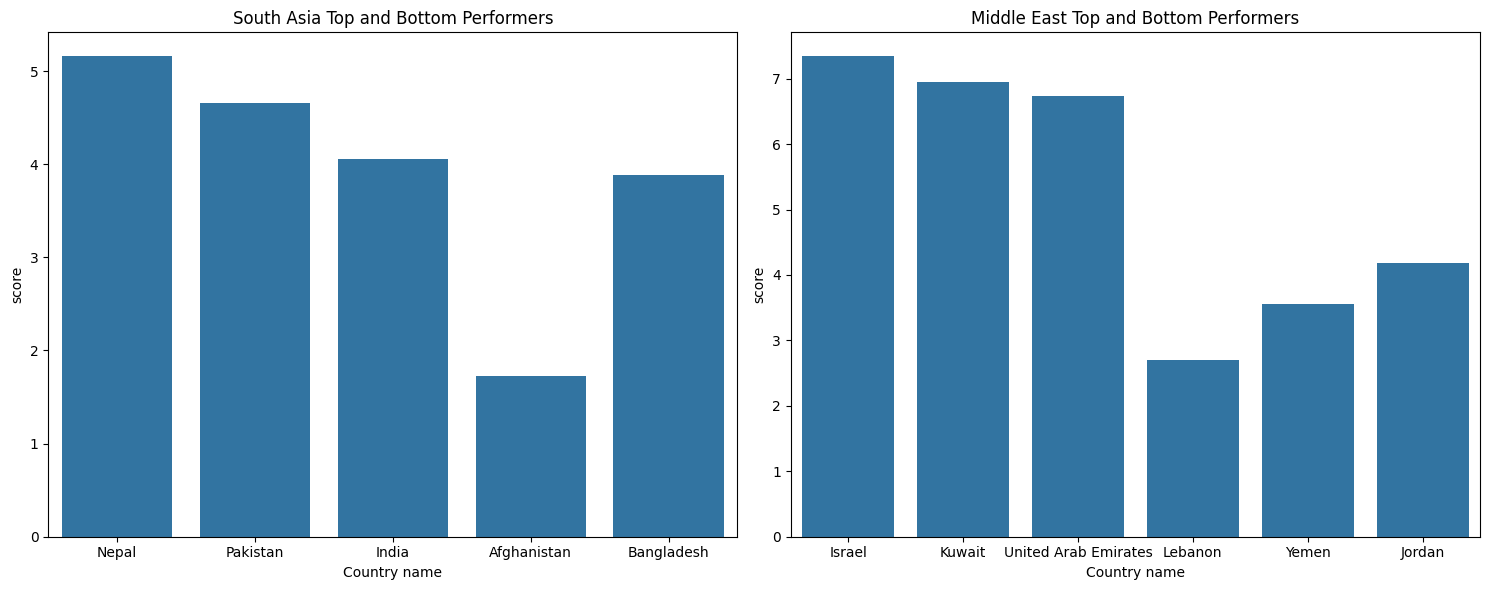

In [130]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Country name', y='score', data=pd.concat([south_asia_top3, south_asia_bottom3]))
plt.title('South Asia Top and Bottom Performers')


plt.subplot(1, 2, 2)
sns.barplot(x='Country name', y='score', data=pd.concat([middle_east_top3, middle_east_bottom3]))
plt.title('Middle East Top and Bottom Performers')

plt.tight_layout()
plt.show()

3. Metric Comparisons:

• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.

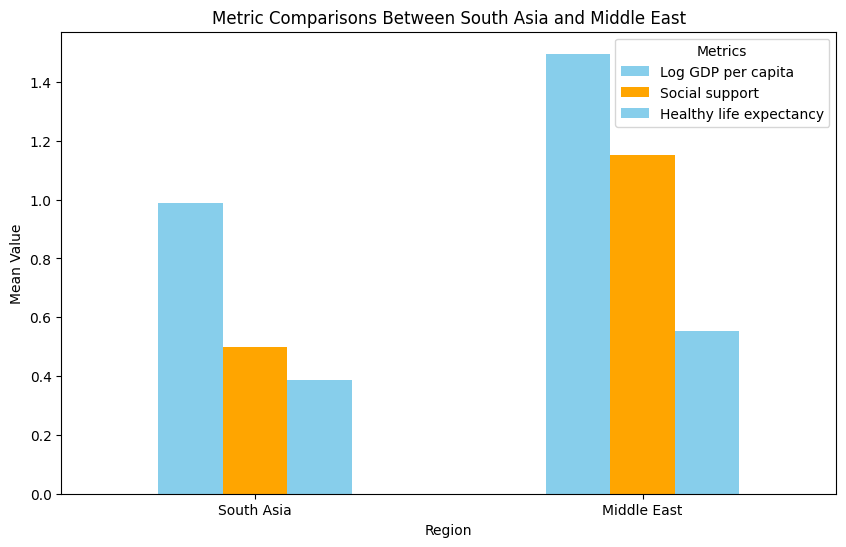

In [131]:
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
south_asia_metrics = south_asia_df[metrics].mean()
middle_east_metrics = middle_east_df[metrics].mean()

comparison_df = pd.DataFrame({'South Asia': south_asia_metrics, 'Middle East': middle_east_metrics}).T
comparison_df.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])
plt.title('Metric Comparisons Between South Asia and Middle East')
plt.ylabel('Mean Value')
plt.xlabel('Region')
plt.xticks(rotation=0)
plt.legend(title='Metrics')
plt.show()

• Which metrics show the largest disparity between the two regions?

In [132]:
disparity = (middle_east_metrics - south_asia_metrics).abs()
largest_disparity = disparity.idxmax()
print(f"Metric with the largest disparity: {largest_disparity}")

Metric with the largest disparity: Social support


4. Happiness Disparity:

• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.

In [133]:
south_asia_range = south_asia_df['score'].max() - south_asia_df['score'].min()
middle_east_range = middle_east_df['score'].max() - middle_east_df['score'].min()

south_asia_cv = south_asia_df['score'].std() / south_asia_df['score'].mean()
middle_east_cv = middle_east_df['score'].std() / middle_east_df['score'].mean()

print(f"South Asia - Range: {south_asia_range:.2f}, CV: {south_asia_cv:.2f}")
print(f"Middle East - Range: {middle_east_range:.2f}, CV: {middle_east_cv:.2f}")


South Asia - Range: 3.44, CV: 0.34
Middle East - Range: 4.63, CV: 0.29


• Which region has greater variability in happiness?

In [134]:
if south_asia_cv > middle_east_cv:
    print("South Asia has greater variability in happiness.")
else:
    print("Middle East has greater variability in happiness.")

South Asia has greater variability in happiness.


5. Correlation Analysis:

• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.

In [135]:
for region, df in [('South Asia', south_asia_df), ('Middle East', middle_east_df)]:
    freedom_corr = df['Freedom to make life choices'].corr(df['score'])
    generosity_corr = df['Generosity'].corr(df['score'])
    print(f"{region} - Freedom Correlation: {freedom_corr:.2f}, Generosity Correlation: {generosity_corr:.2f}")

South Asia - Freedom Correlation: 0.80, Generosity Correlation: 0.88
Middle East - Freedom Correlation: 0.86, Generosity Correlation: 0.63


• Create scatter plots to visualize and interpret the relationships.

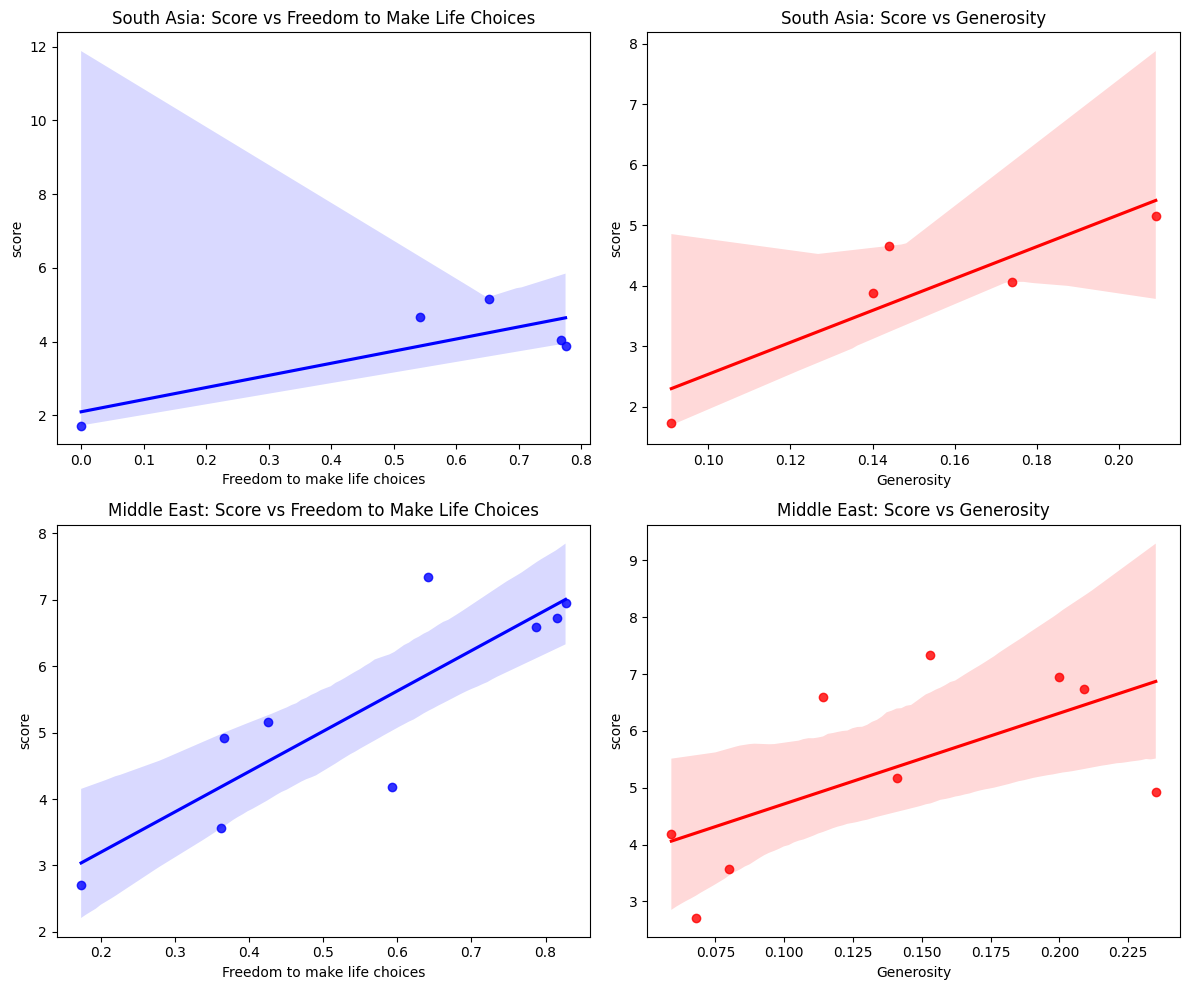

In [136]:
ig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.regplot(x='Freedom to make life choices', y='score', data=south_asia_df, ax=axes[0, 0], color='blue')
axes[0, 0].set_title("South Asia: Score vs Freedom to Make Life Choices")

sns.regplot(x='Generosity', y='score', data=south_asia_df, ax=axes[0, 1], color='red')
axes[0, 1].set_title("South Asia: Score vs Generosity")

sns.regplot(x='Freedom to make life choices', y='score', data=middle_east_df, ax=axes[1, 0], color='blue')
axes[1, 0].set_title("Middle East: Score vs Freedom to Make Life Choices")

sns.regplot(x='Generosity', y='score', data=middle_east_df, ax=axes[1, 1], color='red')
axes[1, 1].set_title("Middle East: Score vs Generosity")

plt.tight_layout()
plt.show()




6. Outlier Detection:

• Identify outlier countries in both regions based on Score and GDP per Capita.

In [137]:
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

south_asia_outliers = detect_outliers(south_asia_df, 'score')
middle_east_outliers = detect_outliers(middle_east_df, 'score')

• Plot these outliers and discuss their implications.

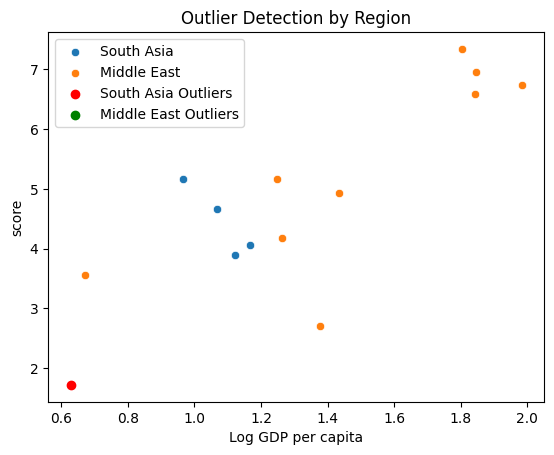

In [138]:
sns.scatterplot(data=south_asia_df, x='Log GDP per capita', y='score', label='South Asia')
sns.scatterplot(data=middle_east_df, x='Log GDP per capita', y='score', label='Middle East')
plt.scatter(south_asia_outliers['Log GDP per capita'], south_asia_outliers['score'], color='red', label='South Asia Outliers')
plt.scatter(middle_east_outliers['Log GDP per capita'], middle_east_outliers['score'], color='green', label='Middle East Outliers')
plt.legend()
plt.title('Outlier Detection by Region')
plt.show()

7. Visualization:

• Create boxplots comparing the distribution of Score between South Asia and the Middle East.

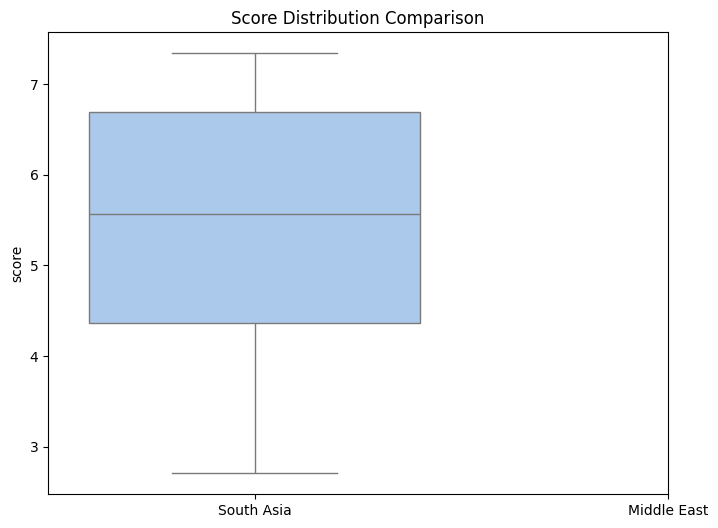

In [139]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=[south_asia_df['score'], middle_east_df['score']], palette='pastel')
plt.xticks([0, 1], ['South Asia', 'Middle East'])
plt.title('Score Distribution Comparison')
plt.ylabel('score')
plt.show()

• Interpret the key differences in distribution shapes, medians, and outliers.